# ***Data Collection***
* Data Collection is an essential part of exploratory data analysis. It refers to
the process of finding and loading data into our system. Good, reliable data can be found on various public sites or bought from private organizations. Some reliable sites for data collection are Kaggle, Github, Machine Learning Repository, etc.

* The data depicted below represents life expectancy dataset that is available on Kaggle. It contains 183 country information and many factors that could affect the life expectancy.




In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy.stats import shapiro, kstest
pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv('life_expectancy.csv')

In [3]:
df.sample(frac = 0.01)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1387,Kiribati,2006,Developing,65.0000,212.0000,0,0.7600,18.1946,88.0000,0,...,86.0000,1.9300,86.0000,0.1000,1151.5556,9426.0000,0.2000,0.1000,0.5760,12.1000
2148,Russian Federation,2002,Developing,64.8000,313.0000,20,10.8700,266.5417,81.0000,580,...,97.0000,5.9900,97.0000,0.3000,2375.5944,1453646.0000,2.7000,2.9000,0.7270,12.8000
2570,Thailand,2014,Developing,74.6000,152.0000,8,6.4100,789.0773,99.0000,0,...,99.0000,4.1200,99.0000,0.1000,5941.8471,68416772.0000,7.8000,7.8000,0.7370,13.6000
2638,Tonga,2010,Developing,72.8000,142.0000,0,1.2400,471.8308,82.0000,0,...,84.0000,4.5900,82.0000,0.1000,3547.5997,14137.0000,0.1000,0.1000,0.7070,14.4000
1151,Honduras,2002,Developing,71.6000,169.0000,6,3.0900,154.8636,94.0000,0,...,95.0000,7.2800,95.0000,1.5000,1132.8721,6863157.0000,2.7000,2.6000,0.5610,10.1000
970,Gambia,2007,Developing,58.5000,288.0000,3,2.6400,0.0000,97.0000,0,...,94.0000,5.7600,95.0000,3.1000,NaN,NaN,8.8000,8.7000,0.4200,8.4000
1849,New Zealand,2011,Developed,86.0000,72.0000,0,9.4700,8342.4058,95.0000,597,...,95.0000,11.2400,95.0000,0.1000,38426.5581,NaN,0.3000,0.3000,0.9010,19.7000
45,Algeria,2002,Developing,71.6000,145.0000,20,0.3600,148.5120,NaN,5862,...,86.0000,3.7300,86.0000,0.1000,1774.3367,3199546.0000,6.3000,6.2000,0.6530,11.1000
2547,Syrian Arab Republic,2005,Developing,73.5000,127.0000,9,0.9200,116.2586,83.0000,375,...,83.0000,4.1100,8.0000,0.1000,1577.4572,18294611.0000,6.5000,6.3000,0.6240,11.0000
1932,Oman,2009,Developing,75.4000,18.0000,1,0.5600,1040.6295,98.0000,19,...,96.0000,2.8300,98.0000,0.1000,16784.3462,NaN,6.9000,6.8000,0.7820,12.4000


### Descriptive statistic


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2928.0000,69.2249,9.5239,36.3000,63.1000,72.1000,75.7000,89.0000
Adult Mortality,2928.0000,164.7964,124.2921,1.0000,74.0000,144.0000,228.0000,723.0000
infant deaths,2938.0000,30.3039,117.9265,0.0000,0.0000,3.0000,22.0000,1800.0000
Alcohol,2744.0000,4.6029,4.0524,0.0100,0.8775,3.7550,7.7025,17.8700
percentage expenditure,2938.0000,738.2513,1987.9149,0.0000,4.6853,64.9129,441.5341,19479.9116
Hepatitis B,2385.0000,80.9405,25.0700,1.0000,77.0000,92.0000,97.0000,99.0000
Measles,2938.0000,2419.5922,11467.2725,0.0000,0.0000,17.0000,360.2500,212183.0000
BMI,2904.0000,38.3212,20.0440,1.0000,19.3000,43.5000,56.2000,87.3000
under-five deaths,2938.0000,42.0357,160.4455,0.0000,0.0000,4.0000,28.0000,2500.0000


In [5]:
# rename the columns
df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

##### Numerical variable: dtypes: float64(16), int64(4)
##### Categorical variable: object(2)

In [7]:
df_categorical = df[['Country', 'Status']]
df_numerical = df[['Year', 'Life expectancy', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles', 'BMI', 'under-five deaths','Polio', 'Total expenditure','Diphtheria','HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']]

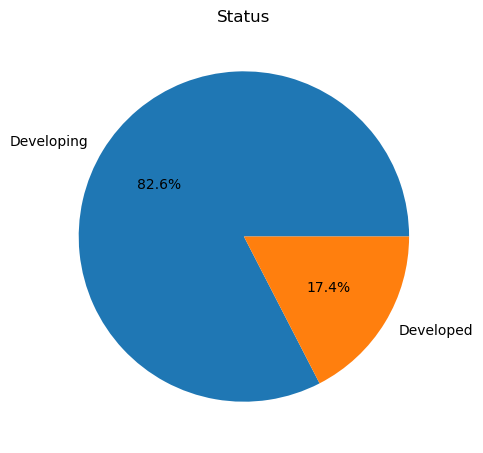

In [8]:
# construct a freq piechart for each categorical data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 8))
x = df['Status'].value_counts().reset_index()
plt.pie(x=x['count'], labels=x['Status'], autopct="%0.1f%%")
plt.title('Status')
plt.tight_layout()
plt.show()

/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

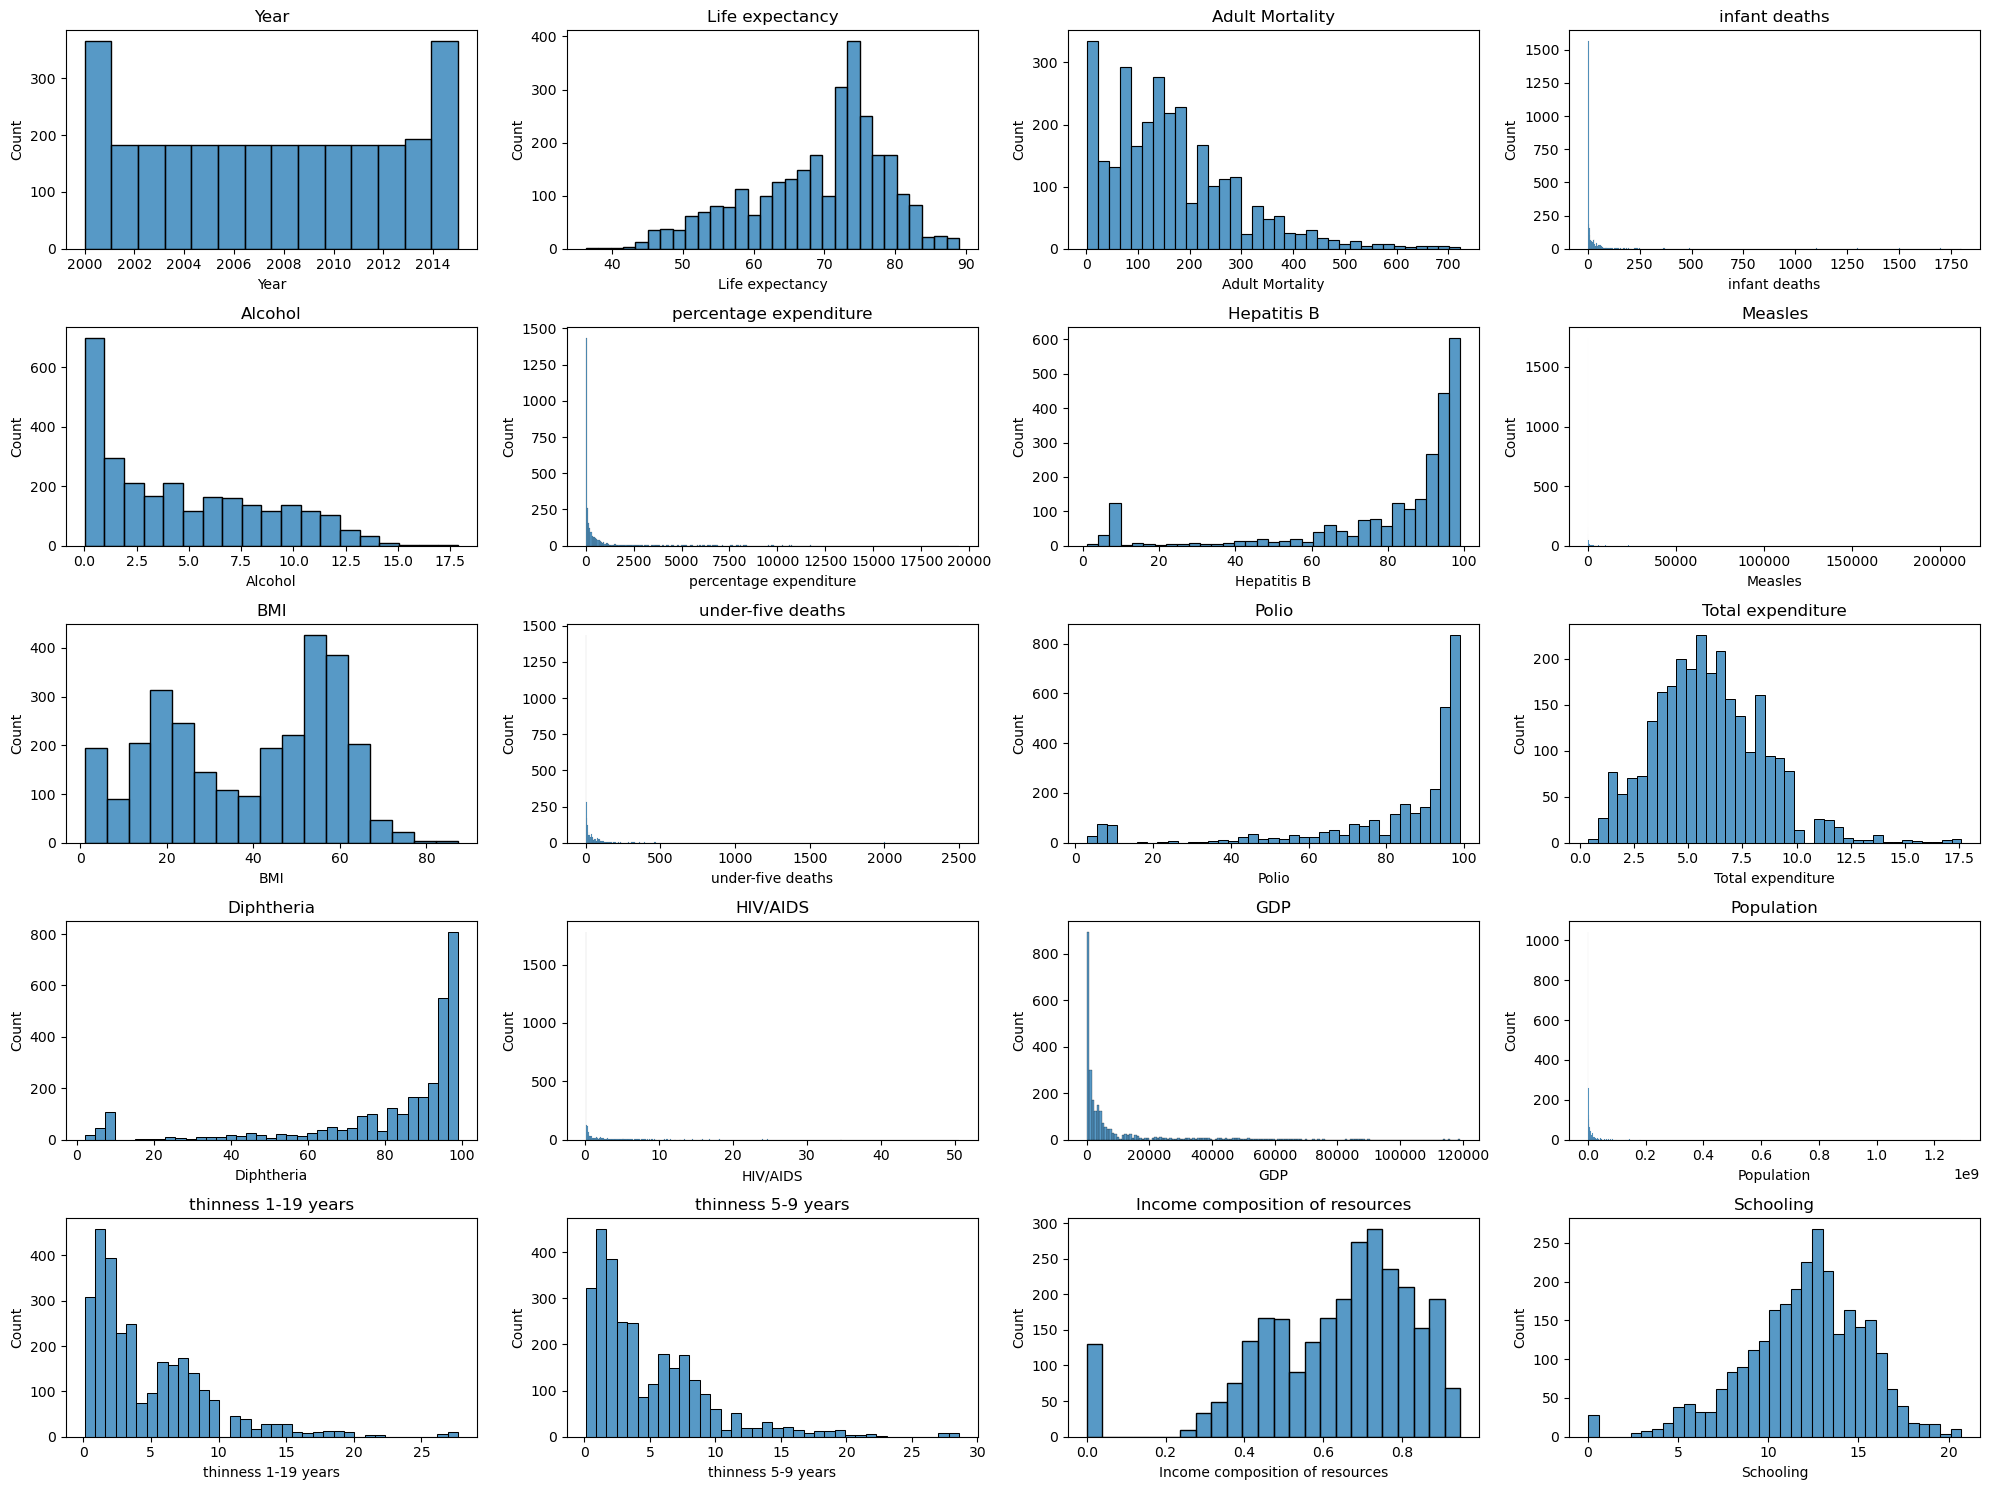

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_numerical.columns):
    plt.subplot(5, 4, i + 1)  # Adjust the number of rows and columns for subplot
    sns.histplot(df_numerical[col], kde=False)
    plt.title(col)
    plt.tight_layout()

plt.show()


# **Data Preprocessing**
Data cleaning refers to the process of removing unwanted variables and values from your dataset and getting rid of any irregularities in it. Such anomalies can disproportionately skew the data and hence adversely affect the results. Some steps that can be done to clean data are:





* Removing missing values, outliers, and unnecessary rows/ columns.
* Re-indexing and reformatting our data.

In [10]:
#check to see the number of missing values in each column
df.isna().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
# Reinformation
df = pd.DataFrame(df)

# Assuming df_main should be a copy of df before interpolation (if needed)
df_main = df.copy()

# Interpolating specific columns
filled_col = df[['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B']].interpolate()

# Correctly assigning interpolated columns back to df_main
df_main['Life expectancy'] = filled_col['Life expectancy']
df_main['Adult Mortality'] = filled_col['Adult Mortality']
df_main['Alcohol'] = filled_col['Alcohol']
df_main['Hepatitis B'] = filled_col['Hepatitis B']

df_main

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.4790,10.1000
1,Afghanistan,2014,Developing,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.4760,10.0000
2,Afghanistan,2013,Developing,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.4700,9.9000
3,Afghanistan,2012,Developing,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.4630,9.8000
4,Afghanistan,2011,Developing,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.4540,9.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3000,723.0000,27,4.3600,0.0000,68.0000,31,...,67.0000,7.1300,65.0000,33.6000,454.3667,12777511.0000,9.4000,9.4000,0.4070,9.2000
2934,Zimbabwe,2003,Developing,44.5000,715.0000,26,4.0600,0.0000,7.0000,998,...,7.0000,6.5200,68.0000,36.7000,453.3512,12633897.0000,9.8000,9.9000,0.4180,9.5000
2935,Zimbabwe,2002,Developing,44.8000,73.0000,25,4.4300,0.0000,73.0000,304,...,73.0000,6.5300,71.0000,39.8000,57.3483,125525.0000,1.2000,1.3000,0.4270,10.0000
2936,Zimbabwe,2001,Developing,45.3000,686.0000,25,1.7200,0.0000,76.0000,529,...,76.0000,6.1600,75.0000,42.1000,548.5873,12366165.0000,1.6000,1.7000,0.4270,9.8000


### Check descriptive statistical again

In [12]:
df_main.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2938.0000,2904.0000,2938.0000,2919.0000,2712.0000,2919.0000,2938.0000,2490.0000,2286.0000,2904.0000,2904.0000,2771.0000,2775.0000
mean,2007.5187,69.2149,164.7446,30.3039,4.5502,738.2513,78.5284,2419.5922,38.3212,42.0357,82.5502,5.9382,82.3241,1.7421,7483.1585,12753375.1201,4.8397,4.8703,0.6276,11.9928
std,4.6138,9.5108,124.2266,117.9265,3.9948,1987.9149,25.1838,11467.2725,20.0440,160.4455,23.4280,2.4983,23.7169,5.0778,14270.1693,61012096.5084,4.4202,4.5089,0.2109,3.3589
min,2000.0000,36.3000,1.0000,0.0000,0.0100,0.0000,1.0000,0.0000,1.0000,0.0000,3.0000,0.3700,2.0000,0.1000,1.6813,34.0000,0.1000,0.1000,0.0000,0.0000
25%,2004.0000,63.1000,74.0000,0.0000,0.9025,4.6853,71.0000,0.0000,19.3000,0.0000,78.0000,4.2600,78.0000,0.1000,463.9356,195793.2500,1.6000,1.5000,0.4930,10.1000
50%,2008.0000,72.0000,144.0000,3.0000,3.7025,64.9129,89.0000,17.0000,43.5000,4.0000,93.0000,5.7550,93.0000,0.1000,1766.9476,1386542.0000,3.3000,3.3000,0.6770,12.3000
75%,2012.0000,75.6000,228.0000,22.0000,7.5500,441.5341,96.0000,360.2500,56.2000,28.0000,97.0000,7.4925,97.0000,0.8000,5910.8063,7420359.0000,7.2000,7.2000,0.7790,14.3000
max,2015.0000,89.0000,723.0000,1800.0000,17.8700,19479.9116,99.0000,212183.0000,87.3000,2500.0000,99.0000,17.6000,99.0000,50.6000,119172.7418,1293859294.0000,27.7000,28.6000,0.9480,20.7000


In [13]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [14]:
df_main.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
correlations = df_numerical.corr()['Life expectancy'].drop('Life expectancy')

# Filter columns with high correlation
high_corr = correlations[correlations.abs() > 0.5]

# Define the feature set X
X = df_numerical[high_corr.index]

high_corr

Adult Mortality                   -0.6964
BMI                                0.5677
HIV/AIDS                          -0.5566
Income composition of resources    0.7248
Schooling                          0.7520
Name: Life expectancy, dtype: float64

top 5 highest correlation with life expectancy:
1. Adult Mortality
2. BMI
3. HIV/AIDS
4. Income composition of resources
5. Schooling

In [16]:
# Define the columns of interest
columns = ['Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']

# Compute and print the statistics for each column
for column in columns:
    print(f"Statistics for {column}:")

    # Central tendency
    mean = df_main[column].mean()
    median = df_main[column].median()
    mode = df_main[column].mode()[0]
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

    # Dispersion
    std_dev = df_main[column].std()
    var = df_main[column].var()
    range_val = df_main[column].max() - df_main[column].min()
    print(f"Standard Deviation: {std_dev}, Variance: {var}, Range: {range_val}")

    # Position (using percentiles as an example)
    percentiles = df_main[column].quantile([0.25, 0.5, 0.75])
    print(f"25th percentile: {percentiles[0.25]}, Median: {percentiles[0.5]}, 75th percentile: {percentiles[0.75]}")

    # Outliers (using the IQR method as an example)
    IQR = percentiles[0.75] - percentiles[0.25]
    lower_bound = percentiles[0.25] - 1.5 * IQR
    upper_bound = percentiles[0.75] + 1.5 * IQR
    outliers = df_main[(df_main[column] < lower_bound) | (df_main[column] > upper_bound)][column]
    print(f"Number of Outliers: {outliers.count()}")

    # Five-number summary
    min_val = df_main[column].min()
    max_val = df_main[column].max()
    print(f"Min: {min_val}, 25th percentile: {percentiles[0.25]}, Median: {percentiles[0.5]}, 75th percentile: {percentiles[0.75]}, Max: {max_val}")

    print("\n")

Statistics for Adult Mortality:
Mean: 164.74455411844792, Median: 144.0, Mode: 12.0
Standard Deviation: 124.22659620187613, Variance: 15432.247203903988, Range: 722.0
25th percentile: 74.0, Median: 144.0, 75th percentile: 228.0
Number of Outliers: 82
Min: 1.0, 25th percentile: 74.0, Median: 144.0, 75th percentile: 228.0, Max: 723.0


Statistics for BMI:
Mean: 38.321246556473824, Median: 43.5, Mode: 58.5
Standard Deviation: 20.044033502562073, Variance: 401.7632790518308, Range: 86.3
25th percentile: 19.3, Median: 43.5, 75th percentile: 56.2
Number of Outliers: 0
Min: 1.0, 25th percentile: 19.3, Median: 43.5, 75th percentile: 56.2, Max: 87.3


Statistics for HIV/AIDS:
Mean: 1.7421034717494894, Median: 0.1, Mode: 0.1
Standard Deviation: 5.077784531086524, Variance: 25.783895744141596, Range: 50.5
25th percentile: 0.1, Median: 0.1, 75th percentile: 0.8
Number of Outliers: 542
Min: 0.1, 25th percentile: 0.1, Median: 0.1, 75th percentile: 0.8, Max: 50.6


Statistics for Income composition o

/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


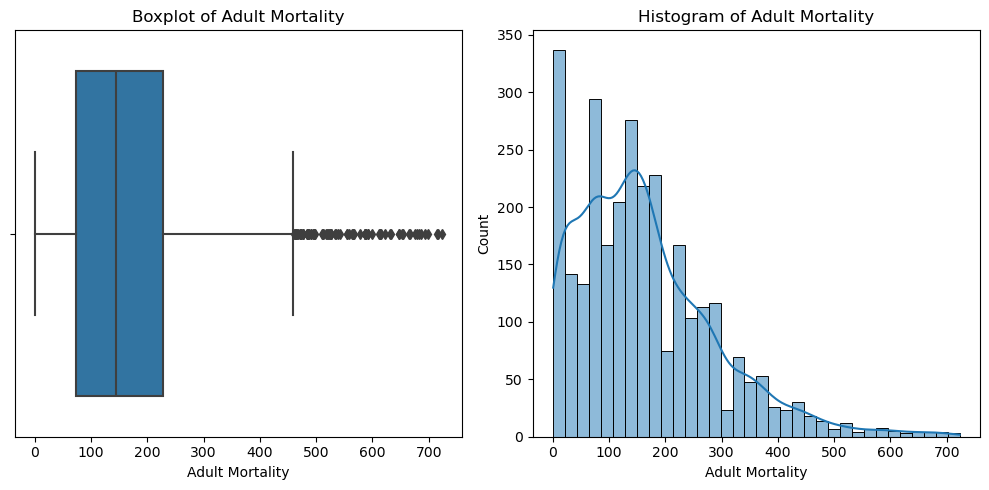

Sample does not normal distributed (reject H0)


/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


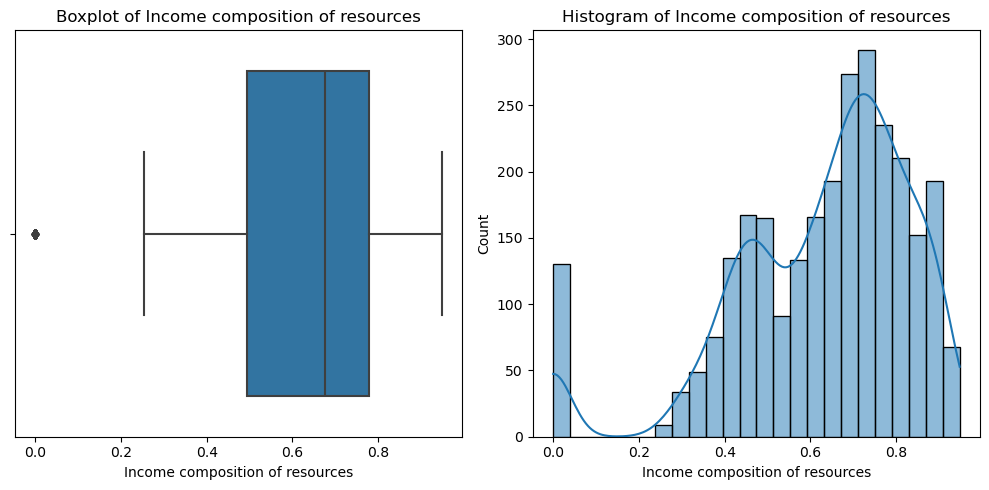

Sample looks normal distributed (fail to reject H0)


/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


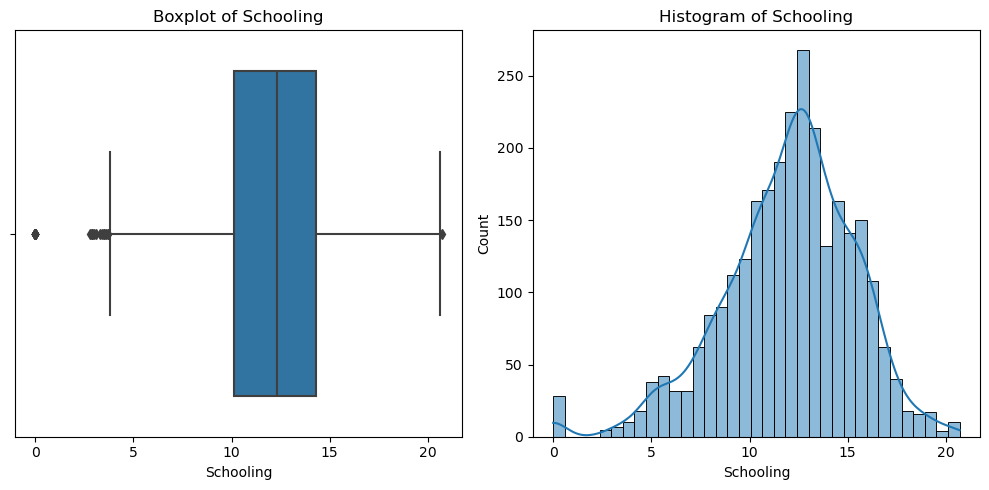

Sample looks normal distributed (fail to reject H0)


In [17]:
for column in  ['Adult Mortality',  'Income composition of resources', 'Schooling']:

   
    plt.figure(figsize=(10, 5))

    # Create a subplot for the boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_main[column])
    plt.title(f"Boxplot of {column}")

    # Create a subplot for the histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df_main[column], kde=True)
    plt.title(f"Histogram of {column}")

    # Display the plots
    plt.tight_layout()
    plt.show()
    stat, p = shapiro(df_main[column])
    alpha = 0.05
    if p > alpha:
      print('Sample looks normal distributed (fail to reject H0)')
    else:
      print('Sample does not normal distributed (reject H0)')


### Schooling is quiet good, but Adults Mortality is right skewed, and the Income composition of resources is left skewed. We need to normalize the data to make it more normally distributed.


In [18]:
df_main.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/son/Downloads/Apps/Anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


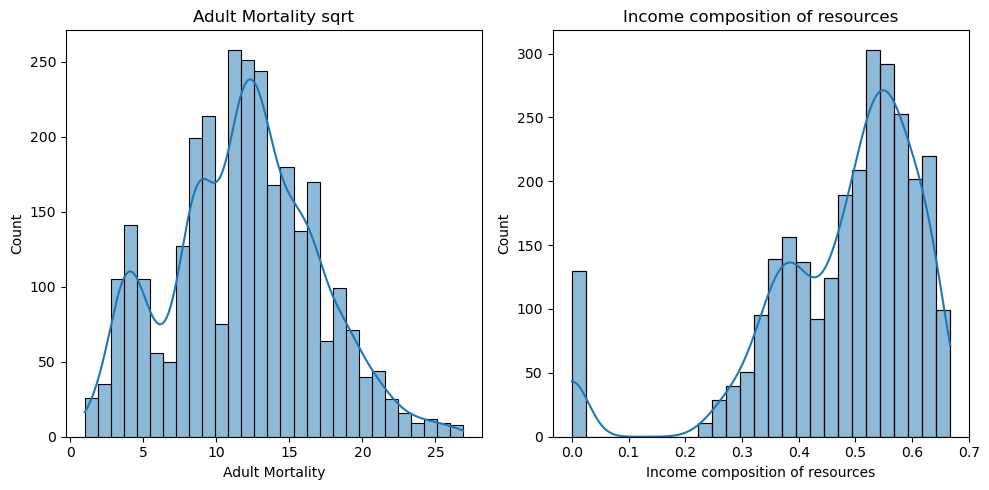

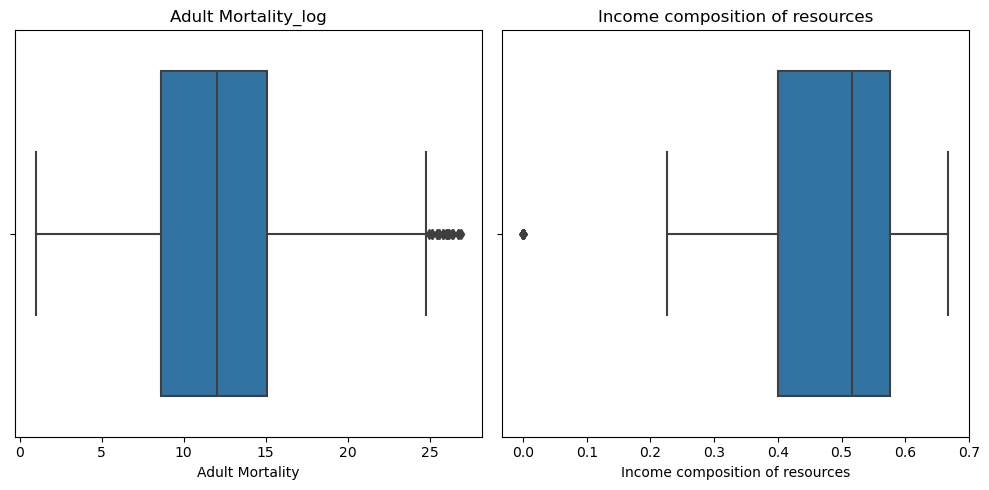

In [19]:
# transform log for the column
df_main['Adult Mortality'] = np.sqrt(df_main['Adult Mortality'])
df_main['Income composition of resources'] = np.log1p(df_main['Income composition of resources'])

# plot histogram for the transformed columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_main['Adult Mortality'], kde=True)
plt.title('Adult Mortality sqrt')
plt.subplot(1, 2, 2)
sns.histplot(df_main['Income composition of resources'], kde=True)
plt.title('Income composition of resources')
plt.tight_layout()
plt.show();
# plot boxplot for the transformed columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_main['Adult Mortality'])
plt.title('Adult Mortality_log')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_main['Income composition of resources'])
plt.title('Income composition of resources')
plt.tight_layout()
plt.show();

In [20]:
# count the number of outliers in the transformed columns using the IQR method
def count_outliers(column):
    Q1 = df_main[column].quantile(0.25)
    Q3 = df_main[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_main[(df_main[column] < lower_bound) | (df_main[column] > upper_bound)][column].count()

print(f"Number of outliers in Adult Mortality_sqrt: {count_outliers('Adult Mortality')}")
print(f"Number of outliers in Income composition of resources_log: {count_outliers('Income composition of resources')}")


Number of outliers in Adult Mortality_sqrt: 18
Number of outliers in Income composition of resources_log: 130


### After transforming the data, we can see that the outlier impact has been reduced. Schooling variable is maintained, while Adult Mortality and Income composition of resources are transformed to reduce outliers impacts and to build better OLS regression. Thus,we choose School, square root of Adult Mortality, and log of Income composition of resources as our independent variables.

# **Univariate Analysis**
In Univariate Analysis, we analyze data of just one variable. A variable in your dataset refers to a single feature/ column. It can be done either with graphical or non-graphical means by finding specific mathematical values in the data. Some visual methods include:

* Histograms: Bar plots in which the frequency of data is represented with rectangle bars.
* Box-plots: Here the information is represented in the form of boxes.

In [21]:
freq_table = pd.pivot_table(df_main, index='Year', columns= 'Status', aggfunc='size')
print(freq_table)

Status  Developed  Developing
Year                         
2000           32         151
2001           32         151
2002           32         151
2003           32         151
2004           32         151
2005           32         151
2006           32         151
2007           32         151
2008           32         151
2009           32         151
2010           32         151
2011           32         151
2012           32         151
2013           32         161
2014           32         151
2015           32         151


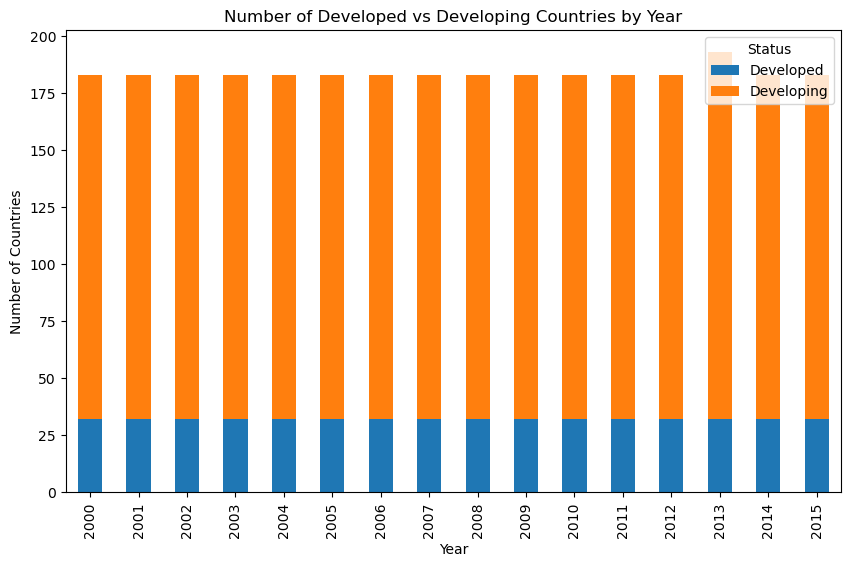

In [22]:
import matplotlib.pyplot as plt

# Plotting
freq_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Developed vs Developing Countries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Status')
plt.show()


Frequency Table:
Status
Developing    2426
Developed      512
Name: count, dtype: int64


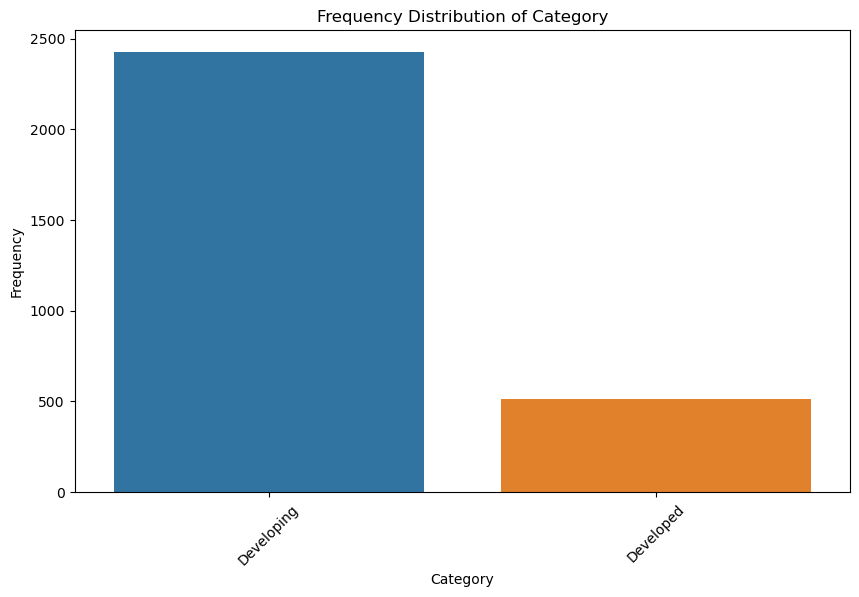

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
# Assuming df is your DataFrame and 'Category' is your categorical column
category_counts = df_main['Status'].value_counts()

# Print frequency table
print("Frequency Table:")
print(category_counts)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Frequency Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the labels if they overlap
plt.show()


In [24]:
df_main.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,16.2173,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.3914,10.1000
1,Afghanistan,2014,Developing,59.9000,16.4621,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.3893,10.0000
2,Afghanistan,2013,Developing,59.9000,16.3707,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.3853,9.9000
3,Afghanistan,2012,Developing,59.5000,16.4924,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.3805,9.8000
4,Afghanistan,2011,Developing,59.2000,16.5831,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.3743,9.5000


# **Bivariate Analysis**
 Using two variables and compare them. This way, we can find how one feature affects the other. It is done with scatter plots, which plot individual data points or correlation matrices that plot the correlation in hues. We can also use boxplots.
          

In [25]:
print(df_main.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


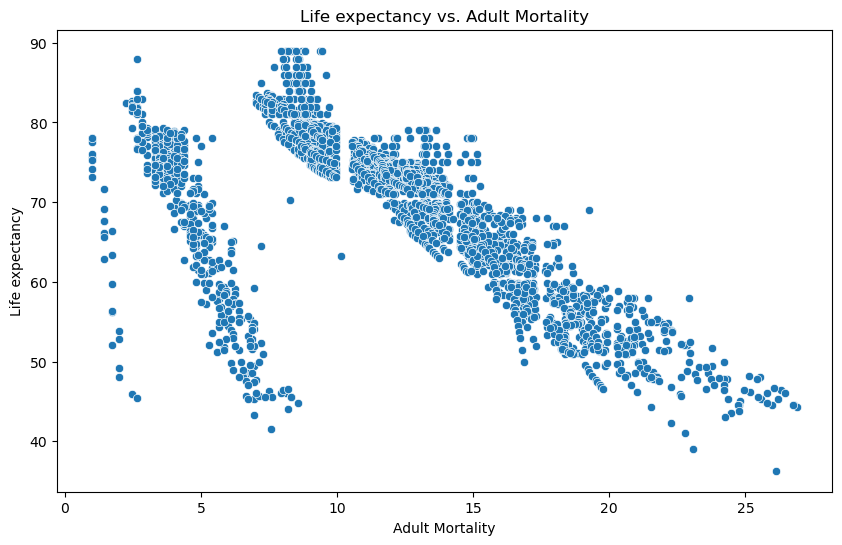

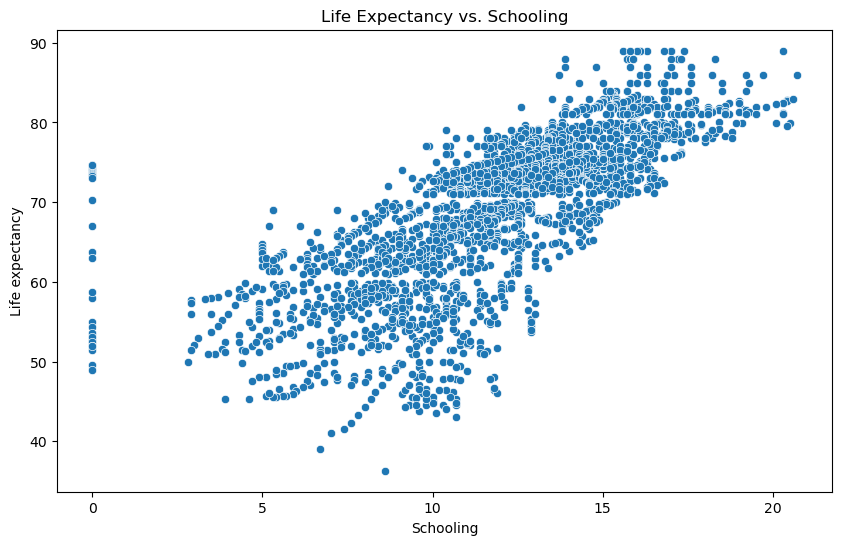

In [26]:
# Scatter plot of Adult Mortality vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='Adult Mortality', y='Life expectancy')
plt.title('Life expectancy vs. Adult Mortality')
plt.show()

# Scatter plot of Infant Deaths vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='Schooling', y='Life expectancy')
plt.title('Life Expectancy vs. Schooling')
plt.show()

### Correlation matrix

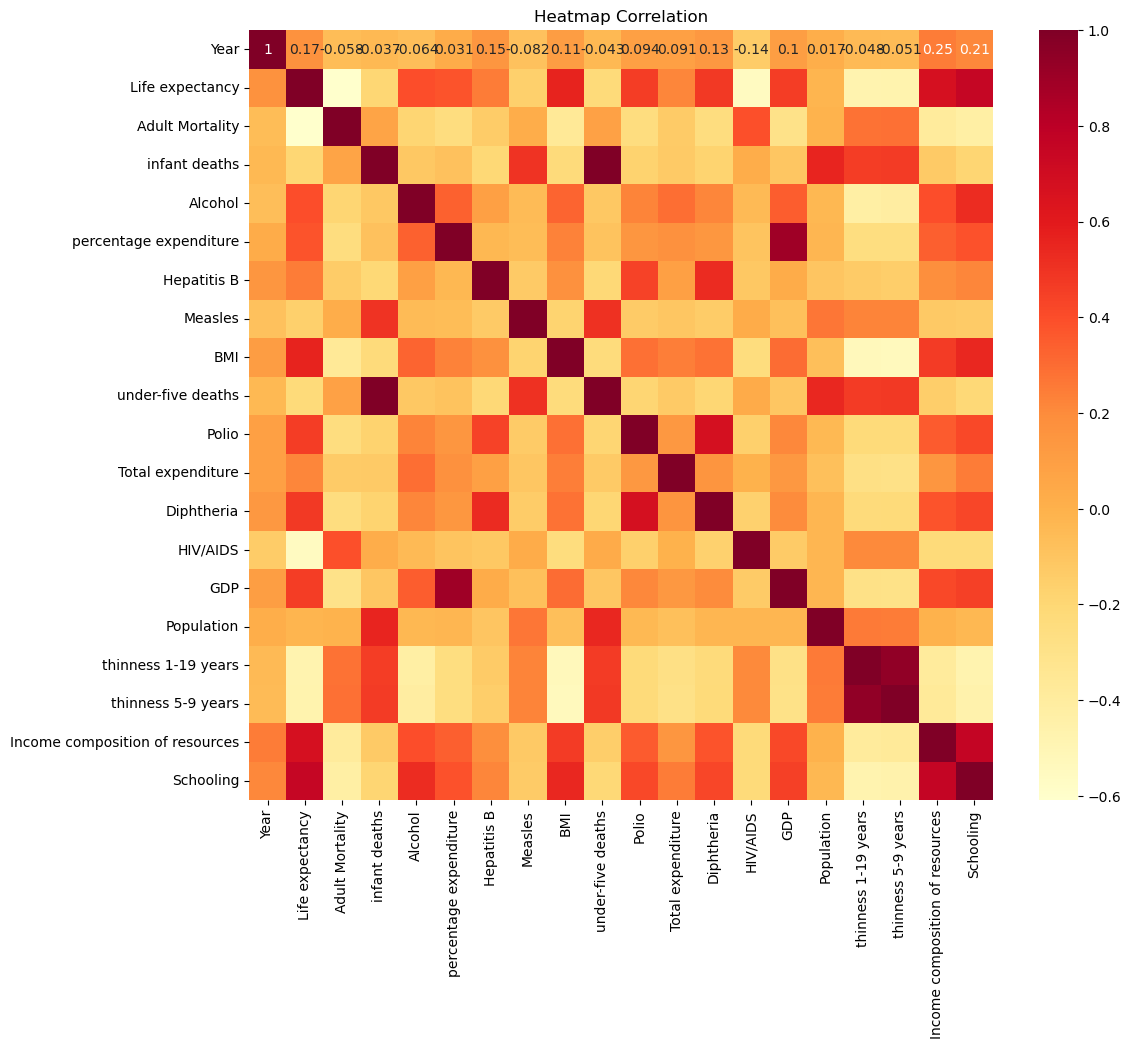

In [27]:
df.copy = df_main
df_qtt = df_main.drop(['Country','Status'],axis = 1)
# Calculate the correlation matrix
corr_matrix = df_qtt.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Heatmap Correlation')
plt.show()

Base on the heatmap above, we can see that "adult mortality", "income composition of resource" and "schooling" have higher correlation with "life expectancy" than the others. Moreover, three features do not have higher correlation with other features than "life expectancy". Therefore, we can conclude that we do not have multicollinearity and "adult mortality", "income composition of resource" and "schooling" will be selected to build linear regression model.

In [28]:
X1 = df_main['BMI']
X2 = df_main['Adult Mortality']
Y = df_main['Life expectancy']


In [29]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Y ~ X1 + X2',data=df_main).fit()
model1 = smf.ols(formula='Y ~ X1 ',data=df_main).fit()
model2 = smf.ols(formula='Y ~ X2',data=df_main).fit()

# model = smf.ols(formula='Life expectancy ~ Adult Mortality + BMI',data=df_main).fit()
# co khoang cach trong ten nen loi syntax => 'Y ~ X1 + X2'


In [30]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     1348.
Date:                Mon, 27 May 2024   Prob (F-statistic):          9.74e-243
Time:                        14:38:44   Log-Likelihood:                -10097.
No. Observations:                2904   AIC:                         2.020e+04
Df Residuals:                    2902   BIC:                         2.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1347      0.314    188.522      0.0

In [31]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1726.
Date:                Mon, 27 May 2024   Prob (F-statistic):          3.98e-297
Time:                        14:38:44   Log-Likelihood:                -10107.
No. Observations:                2938   AIC:                         2.022e+04
Df Residuals:                    2936   BIC:                         2.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.9944      0.360    230.707      0.0

In [32]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1470.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        14:38:44   Log-Likelihood:                -9634.8
No. Observations:                2904   AIC:                         1.928e+04
Df Residuals:                    2901   BIC:                         1.929e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.5520      0.487    149.004      0.0

In [33]:
residuals = model.resid
fitted = model.fittedvalues

# Check 4 residual assumption

#### Linear assumption:

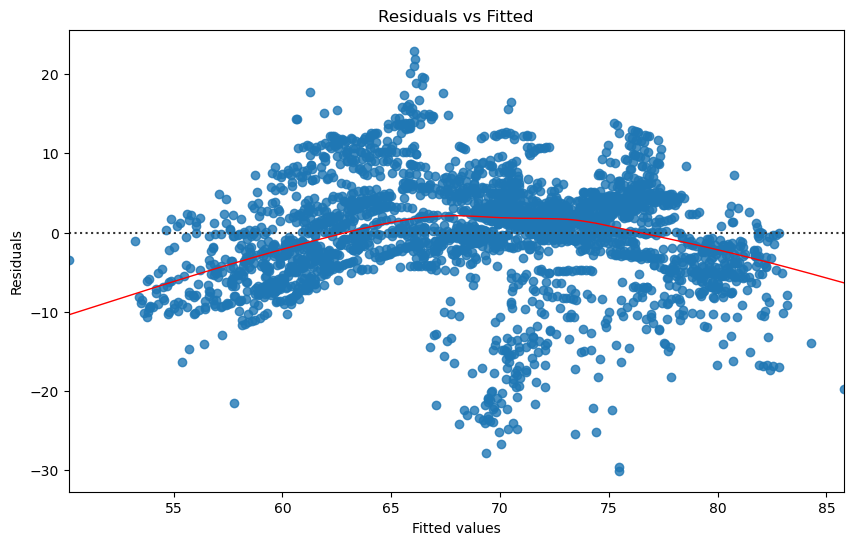

In [34]:
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

Observations from the Plot

        The red line (smoothed trend line) shows a curved pattern.
        Residuals appear to have a pattern rather than being randomly scattered.

Conclusion on Linearity

        Linearity is likely violated: The presence of a systematic pattern (curved shape) in the residuals indicates that the relationship between the independent variables and the dependent variable might not be linear. This suggests that the current model does not adequately capture the true relationship.

#### Homoscedasticity assumption:

In [35]:
# Homoscedasticity (Breusch-Pagan test)
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f'Breusch-Pagan test: Lagrange multiplier statistic = {bp_test[0]}, p-value = {bp_test[1]}')

# Homoscedasticity (White test)
white_test = het_white(residuals, model.model.exog)
print(f'White test: Test statistic = {white_test[0]}, p-value = {white_test[1]}')

if white_test[1] <= 0.05:
    print("There is significant evidence of heteroscedasticity.\n => This implies that the assumption of homoscedasticity is violated.")
else :
    print("There is no significant evidence to suggest heteroscedasticity.\n => This implies that the assumption of homoscedasticity is likely satisfied.")


Breusch-Pagan test: Lagrange multiplier statistic = 640.2896629694252, p-value = 9.180498761309323e-140
White test: Test statistic = 784.4486387919021, p-value = 2.6758873399111895e-167
There is significant evidence of heteroscedasticity.
 => This implies that the assumption of homoscedasticity is violated.


#### Independent assumption:

In [36]:
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 0.7098205412487295



A value between 1.5 and 2.5 generally indicates no autocorrelation.

### Normality assumption

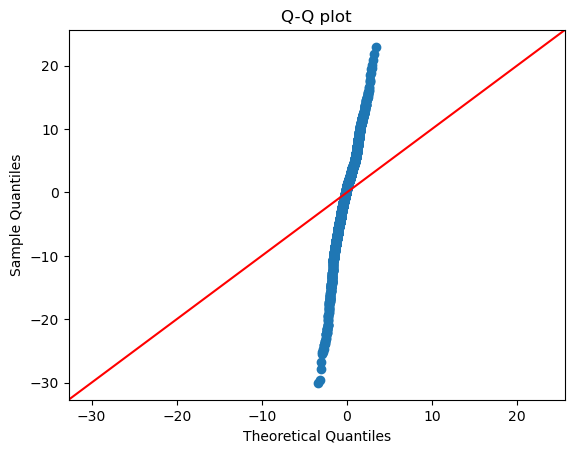

In [37]:
sm.qqplot(residuals, line ='45')
plt.title('Q-Q plot')
plt.show()

In [38]:
# Normality (Shapiro-Wilk test)
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test: Test statistic = {shapiro_test[0]}, p-value = {shapiro_test[1]}')
if shapiro_test[1] > 0.05:
    print("There is no significant evidence to suggest that the residuals are not normally distributed.\n => This implies that the normality assumption is likely satisfied.")
else :
    print("There is significant evidence that the residuals are not normally distributed.\n => This implies that the normality assumption is violated.")


Shapiro-Wilk test: Test statistic = 0.9665582776069641, p-value = 1.9093286131558925e-25
There is significant evidence that the residuals are not normally distributed.
 => This implies that the normality assumption is violated.


If the points on the Q-Q plot lie close to the 45-degree line and the p-values are greater than 0.05, the normality assumption is met.

### Construct confident interval

In [ ]:
import numpy as np
import scipy.stats as stats

def correlation_confidence_interval(x, y, confidence=0.95):
    
    
    
    # Step 2: Apply Fisher's z-transformation
    z = 0.5 * np.log((1 + r) / (1 - r))
    
    # Step 3: Compute the standard error
    n = len(x)
    se = 1 / np.sqrt(n - 3)
    
    # Step 4: Determine the z critical value
    z_critical = stats.norm.ppf(1 - (1 - confidence) / 2)
    
    # Step 5: Calculate the confidence interval in the z-space
    z_lower = z - z_critical * se
    z_upper = z + z_critical * se
    
    # Step 6: Transform the z confidence interval back to the correlation coefficient
    r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)
    
    return r_lower, r_upper
datas = ['Adult Mortality', 'Income composition of resources', 'Schooling']
for i in datas:
  x = df_main[i]
  y = df_main['Life expectancy']
  cor = pd.concat([x, y], axis=1)
  rdata = cor.corr()
  r = rdata.iloc[1][i]
  lower, upper = correlation_confidence_interval(x, y)
  print(f"95% confidence interval for the correlation coefficient between {i} and Life expectancy: ({lower}, {upper})")

### Perform hypothesis testing
